Codebook saved as 'PSID_Codebook.pdf'


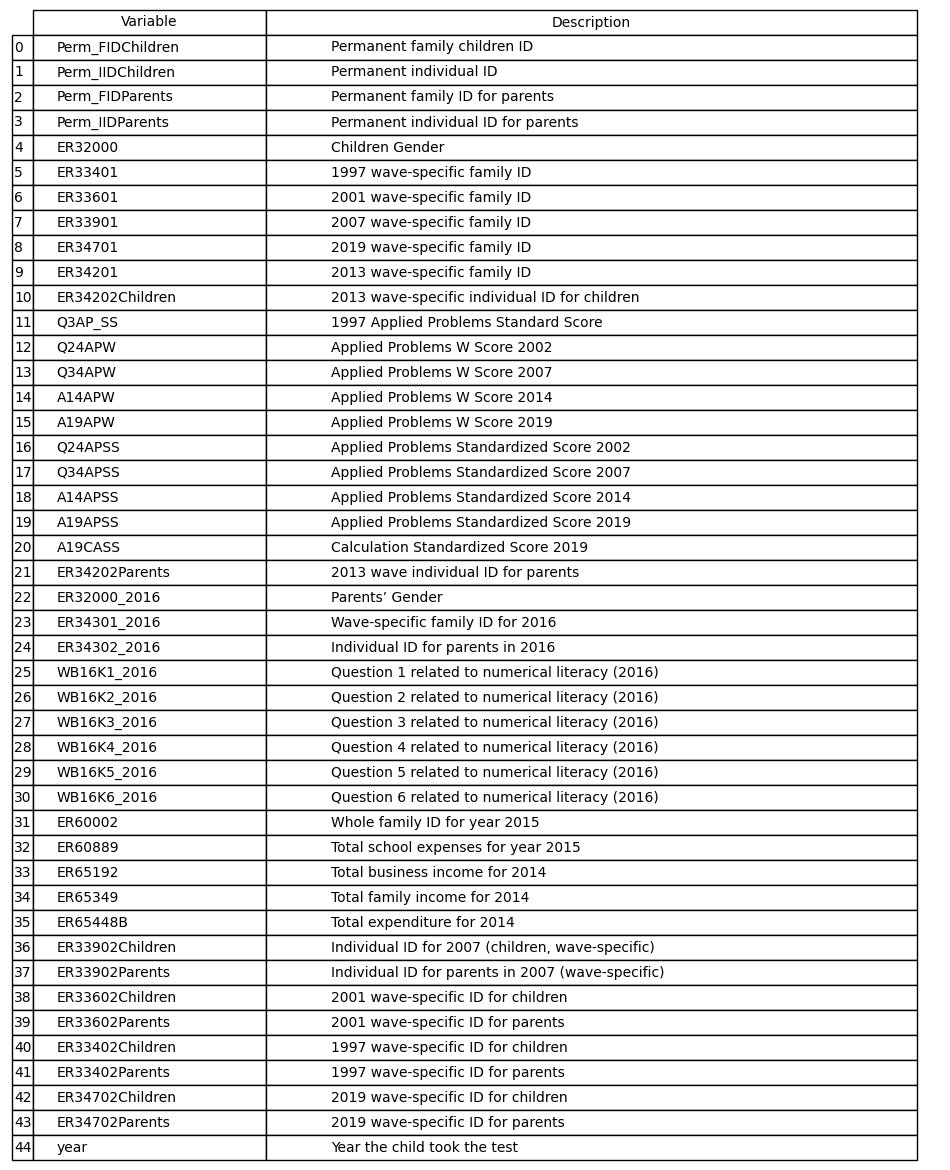

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Load your codebook DataFrame
columns = [
    'Perm_FIDChildren','Perm_IIDChildren','Perm_FIDParents','Perm_IIDParents',
    'ER32000','ER33401','ER33601','ER33901','ER34701','ER34201','ER34202Children',
    'Q3AP_SS','Q24APW','Q34APW','A14APW','A19APW','Q24APSS','Q34APSS','A14APSS','A19APSS',
    'A19CASS','ER34202Parents','ER32000_2016','ER34301_2016','ER34302_2016',
    'WB16K1_2016','WB16K2_2016','WB16K3_2016','WB16K4_2016','WB16K5_2016','WB16K6_2016',
    'ER60002','ER60889','ER65192','ER65349','ER65448B','ER33902Children',
    'ER33902Parents','ER33602Children','ER33602Parents','ER33402Children','ER33402Parents',
    'ER34702Children','ER34702Parents','year'
]

descriptions = [
    "Permanent family children ID","Permanent individual ID","Permanent family ID for parents",
    "Permanent individual ID for parents","Children Gender","1997 wave-specific family ID",
    "2001 wave-specific family ID","2007 wave-specific family ID","2019 wave-specific family ID",
    "2013 wave-specific family ID","2013 wave-specific individual ID for children",
    "1997 Applied Problems Standard Score","Applied Problems W Score 2002",
    "Applied Problems W Score 2007","Applied Problems W Score 2014","Applied Problems W Score 2019",
    "Applied Problems Standardized Score 2002","Applied Problems Standardized Score 2007",
    "Applied Problems Standardized Score 2014","Applied Problems Standardized Score 2019",
    "Calculation Standardized Score 2019","2013 wave individual ID for parents","Parents’ Gender",
    "Wave-specific family ID for 2016","Individual ID for parents in 2016",
    "Question 1 related to numerical literacy (2016)","Question 2 related to numerical literacy (2016)",
    "Question 3 related to numerical literacy (2016)","Question 4 related to numerical literacy (2016)",
    "Question 5 related to numerical literacy (2016)","Question 6 related to numerical literacy (2016)",
    "Whole family ID for year 2015","Total school expenses for year 2015","Total business income for 2014",
    "Total family income for 2014","Total expenditure for 2014","Individual ID for 2007 (children, wave-specific)",
    "Individual ID for parents in 2007 (wave-specific)","2001 wave-specific ID for children","2001 wave-specific ID for parents",
    "1997 wave-specific ID for children","1997 wave-specific ID for parents","2019 wave-specific ID for children",
    "2019 wave-specific ID for parents","Year the child took the test"
]

codebook = pd.DataFrame({
    'Variable': columns,
    'Description': descriptions
})

# Plot table and save as PDF
fig, ax = plt.subplots(figsize=(12, len(codebook)*0.25))
ax.axis('off')
tbl = table(ax, codebook, loc='center', cellLoc='left', colWidths=[0.25, 0.7])
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)  # scale for readability
plt.savefig("PSID_Codebook.pdf", bbox_inches='tight')
print("Codebook saved as 'PSID_Codebook.pdf'")

In [4]:
#1-Raw Files 1 Indivduals Files cleaning to csv and cleaning
from pathlib import Path
import pandas as pd
def build_psid_panel(
        in_folder,          # folder with 1968.xlsx, 1969.xlsx, …
        out_folder,         # where cleaned files are saved
        years,              # iterable, e.g. range(1968, 2024)
        seq_map=None,       # {year: "ER34xxx"} if you want that col renamed → seq_num
):
    in_folder, out_folder = Path(in_folder), Path(out_folder)
    out_folder.mkdir(parents=True, exist_ok=True)

    frames = []

    for yr in years:
        f_in  = in_folder  / f"{yr}.xlsx"
        f_out = out_folder / f"{yr}.csv"

        if not f_in.exists():
            print(f"⚠️  {f_in.name} missing – skipped")
            continue

        # 1️⃣ read the FIRST worksheet (sheet_name=0)
        df = pd.read_excel(f_in, sheet_name=0, engine="openpyxl")

        # 2️⃣ rename permanent IDs if present
        ren = {}
        if "ER30001" in df.columns: ren["ER30001"] = "Perm_FID"
        if "ER30002" in df.columns: ren["ER30002"] = "Perm_IID"

        if ren: df.rename(columns=ren, inplace=True)

        # 4️⃣ add year column
        df["year"] = yr

        # 5️⃣ save cleaned copy
        df.to_csv(f_out, index=False)


        frames.append(df)
        print(f"✅ {f_out.name} written ({len(df):,} rows, {df.shape[1]} cols)")

    if not frames:
        raise RuntimeError("No files processed – check folder/years list.")

    indiv_long = pd.concat(frames, ignore_index=True)
    print(f"\n✨ Combined panel: {len(indiv_long):,} rows • {indiv_long.shape[1]} cols")
    return indiv_long

data_folder = "content/extracted_data/RawData/IndivData" #FOLDER WHERE INDIVDUAL RAW FILES EXIST AS Excel(xlsx)
out_folder = ""
years = range(1997, 2025)#range of years
indiv_long = build_psid_panel(data_folder, out_folder, years)

⚠️  1997.xlsx missing – skipped
⚠️  1998.xlsx missing – skipped
⚠️  1999.xlsx missing – skipped
⚠️  2000.xlsx missing – skipped
⚠️  2001.xlsx missing – skipped
⚠️  2002.xlsx missing – skipped
⚠️  2003.xlsx missing – skipped
⚠️  2004.xlsx missing – skipped
⚠️  2005.xlsx missing – skipped
⚠️  2006.xlsx missing – skipped
⚠️  2007.xlsx missing – skipped
⚠️  2008.xlsx missing – skipped
⚠️  2009.xlsx missing – skipped
⚠️  2010.xlsx missing – skipped
⚠️  2011.xlsx missing – skipped
⚠️  2012.xlsx missing – skipped
⚠️  2013.xlsx missing – skipped
⚠️  2014.xlsx missing – skipped
⚠️  2015.xlsx missing – skipped
⚠️  2016.xlsx missing – skipped
⚠️  2017.xlsx missing – skipped
⚠️  2018.xlsx missing – skipped
⚠️  2019.xlsx missing – skipped
⚠️  2020.xlsx missing – skipped
⚠️  2021.xlsx missing – skipped
⚠️  2022.xlsx missing – skipped
⚠️  2023.xlsx missing – skipped
⚠️  2024.xlsx missing – skipped


RuntimeError: No files processed – check folder/years list.

In [ ]:
#Optional Change Data format to parquet
'''import pandas as pd
for year in range(1968,2025):
  try:
    df = pd.read_csv(f"{year}.csv")               # ⚠️ full file in RAM
    df.to_parquet(f"{year}.parquet",
              compression="zstd",          # snappy | zstd | brotli
              index=False)
  except Exception as e:
    print(year)
    continue
'''

In [ ]:
#2- MERGE ALL INDIVDUAL FILES TOGETHER

frames=[]
import pathlib
from pathlib import Path
import pandas as pd
in_folder = Path('')
for year in range(1997,2025):
  f_in  = in_folder  / f"{year}.csv"
  if not f_in.exists():
            print(f"⚠️  {f_in.name} missing – skipped")
            continue

  #check if it exists
  frames.append(pd.read_csv(f"{year}.csv"))

pd.concat(frames, ignore_index=True).to_csv("IndivdualALL.csv")

⚠️  1998.csv missing – skipped
⚠️  2000.csv missing – skipped
⚠️  2002.csv missing – skipped
⚠️  2004.csv missing – skipped
⚠️  2006.csv missing – skipped
⚠️  2008.csv missing – skipped
⚠️  2010.csv missing – skipped
⚠️  2012.csv missing – skipped
⚠️  2014.csv missing – skipped
⚠️  2016.csv missing – skipped
⚠️  2018.csv missing – skipped
⚠️  2020.csv missing – skipped
⚠️  2022.csv missing – skipped
⚠️  2024.csv missing – skipped


In [ ]:
#3- filter to the variables used

import pandas as pd
#only families that participated in the 2016
a2016=pd.read_excel('content/extracted_data/RawData/Indiv2016.xlsx')#location of 2016 file


a2016.rename(columns={"ER30001": "Perm_FID",
                             "ER30002"  : "Perm_IID"},inplace=True)
merged=pd.read_csv('IndivdualALL.csv')
merged=merged[['Perm_FID','Perm_IID','ER32000','ER32006','ER33401','ER33402','ER33601','ER33602','ER33901','ER33902','ER34701','ER34702','ER34301','ER34302','ER34201','ER34202','year']]

merged = merged[merged['Perm_FID'].isin(a2016['Perm_FID'])]
#drop the 2015
merged=merged[merged['year']!=2015]

#download full indivdual file as csv
merged.to_csv('IndivdualALL.csv')


In [ ]:
#4- prepare CDS(Child Development Supplement) Files years 1997 2002 2007 2014 2019

#NOTE CODE DOES TWO VERSIONS ONE where the children are filtered to only ones who took the test in each year the is not filtered

import pandas as pd
child97 = pd.read_csv('content/extracted_data/RawData/199Child.csv') #file path here for each of the children you may use any format, here done as csv
child97['year'] = 1997

# 2002
child02 = pd.read_csv('content/extracted_data/RawData/Child02.csv')
child02['year'] = 2002

# 2007
child07 = pd.read_csv('content/extracted_data/RawData/Child07.csv')
child07['year'] = 2007

# 2014
child14 = pd.read_csv('content/extracted_data/RawData/Child14.csv')
child14['year'] = 2014

# 2019
child19 = pd.read_csv('content/extracted_data/RawData/Child19.csv')
child19['year'] = 2019
cds_all_Nofilter = pd.concat([child97, child02, child07, child14, child19], ignore_index=True)
cds_all_Nofilter.rename(columns={'ER30001':'Perm_FID','ER30002':'Perm_IID'},inplace=True)
cds_all_Nofilter=cds_all_Nofilter[['Perm_FID','Perm_IID','ER32000','ER32006','ER33401','ER33402','ER33601','ER33602','ER33901','ER33902','ER34701','ER34702','ER34201','ER34202','year',
                                  'Q3APW','Q3AP_SS','Q24APW','Q34APW','A14APW','A19APW','Q24APSS','Q34APSS','A14APSS','A19APSS','A19CASS']]
cds_all_Nofilter.to_csv('cds_all_Nofilter.csv',index=False) #Non Filtered Version

#filter to only children who took the test in each year
child97 = child97[child97["Q3AP_SS"].notnull()]
child02 = child02[child02["Q24APW"].notnull()]
child07 = child07[child07["Q34APW"].notnull()]
child14 = child14[child14["A14APW"].notnull()]
child19 = child19[child19["A19APW"].notnull()]
cds_all = pd.concat([child97, child02, child07, child14, child19], ignore_index=True)

cds_all.to_csv('cds_all.csv', index=False) #Filtered




In [ ]:
# 5- Merge the Indivdual file with 2015 and 2016 and filter to the variables used
import pandas as pd
merged=pd.read_csv('IndivdualALL.csv')
merged=merged[merged['year']!=2015]
a2016=pd.read_excel('content/extracted_data/RawData/Indiv2016.xlsx')
a2015=pd.read_excel('content/extracted_data/RawData/Indiv2015.xlsx')
both=pd.merge(a2015,a2016,on=['ER34301','ER34302','ER30001','ER30002','ER32000','ER32006'],how='inner')
merged=merged[merged['year']!=2016]
both['year']=2016
both.rename(columns={'ER30001': 'Perm_FID', 'ER30002': 'Perm_IID'},inplace=True)
del a2015,a2016
merged=pd.concat([merged,both],ignore_index=True)
merged=merged[['Perm_FID','Perm_IID','ER32000','ER32006','ER33401','ER33402','ER33601','ER33602','ER33901','ER33902','ER34701','ER34702','ER34301','ER34302','ER34201','ER34202','WB16K1','WB16K2','WB16K3','WB16K4','WB16K5','WB16K6','year']]

merged.to_csv('IndivdualALL_2015_2016.csv')

In [ ]:
import pandas as pd
#6-add the family data to all the families and their children for all the years in the CDS and filter them

merged=pd.read_csv('IndivdualALL_2015_2016.csv')
cds_allNo = pd.read_csv("cds_all_Nofilter.csv")


family2016= pd.read_excel('content/extracted_data/FamilyData/family_2015.xlsx')
parents2016=merged[merged['year']==2016]
parents2016=parents2016.merge(family2016,left_on='ER34301',right_on='ER60002',how='left')
child=set(cds_allNo[cds_allNo['year']==2014]['ER34201'])
parents= pd.merge(merged[merged['year']==2013], parents2016, on=['Perm_FID','Perm_IID'], how='inner',    suffixes=('_2013', '_2016')
)
parents.rename(columns={'ER34201_2016': 'ER342011', 'ER34202_2016': 'ER342022','ER34201_2013': 'ER34201', 'ER34202_2013': 'ER34202'},inplace=True)
filtered_parents = parents[parents['ER34201'].isin(child)].copy()
fmily= set(parents['ER34201'])

child97=set(cds_allNo[cds_allNo['year']==1997]['ER33401'])
parents97= pd.merge(merged[merged['year']==1997], parents2016, on=['Perm_FID','Perm_IID'], how='inner',    suffixes=('_2013', '_2016')
)
parents97.rename(columns={'ER33401_2016': 'ER334011', 'ER33402_2016': 'ER334022','ER33401_2013': 'ER33401', 'ER33402_2013': 'ER33402'},inplace=True)
filtered_parents97 = parents97[parents97['ER33401'].isin(child97)].copy()
fmily97= set(parents97['ER33401'])

child02=set(cds_allNo[cds_allNo['year']==2002]['ER33601'])
parents02= pd.merge(merged[merged['year']==2001], parents2016, on=['Perm_FID','Perm_IID'], how='inner',    suffixes=('_2013', '_2016')
)
#ER33601
parents02.rename(columns={'ER33601_2016': 'ER342011', 'ER32602_2016': 'ER342022','ER33601_2013': 'ER33601', 'ER33602_2013': 'ER33602'},inplace=True)
filtered_parents02 = parents02[parents02['ER33601'].isin(child)].copy()
fmily02= set(parents02['ER33601'])

child2007=set(cds_allNo[cds_allNo['year']==2007]['ER34701'])
parents2007= pd.merge(merged[merged['year']==2007], parents2016, on=['Perm_FID','Perm_IID'], how='inner',    suffixes=('_2007', '_2016'))
parents2007.rename(columns={'ER33901_2016': 'ER339011', 'ER33901_2007': 'ER33901', 'ER33902_2016': 'ER33902', 'ER333902_2007': 'ER33902'},inplace=True)
filtered_parents2007 = parents2007[parents2007['ER33901'].isin(child2007)].copy()
fmily2007= set(parents2007['ER33901'])

child2019=set(cds_allNo[cds_allNo['year']==2019]['ER34701'])

parents2019= pd.merge(merged[merged['year']==2019], parents2016, on=['Perm_FID','Perm_IID'], how='inner',    suffixes=('_2019', '_2016')
)
parents2019.rename(columns={'ER34701_2016': 'ER342011', 'ER34702_2016': 'ER342022','ER34701_2019': 'ER34701', 'ER34702_2019': 'ER34702'},inplace=True)
filtered_parents2019 = parents2019[parents2019['ER34701'].isin(child)].copy()
fmily= set(parents2019['ER34701'])

cds_allNo.rename(columns={'ER30001': 'Perm_FID', 'ER30002': 'Perm_IID'},inplace=True)
children= pd.merge(cds_allNo[cds_allNo['year']==2014], merged[merged['year']==2013], on=['ER34201','ER34202'], how='right')
children2019= pd.merge(cds_allNo[cds_allNo['year']==2019], merged[merged['year']==2019], on=['ER34701','ER34702'], how='right')
children2007= pd.merge(cds_allNo[cds_allNo['year']==2007], merged[merged['year']==2007], on=['ER33901','ER33902'], how='right')
children2002= pd.merge(cds_allNo[cds_allNo['year']==2002], merged[merged['year']==2001], on=['ER33601','ER33602'], how='right')
chidlren1997= pd.merge(cds_allNo[cds_allNo['year']==1997], merged[merged['year']==1997], on=['ER33401','ER33402'], how='right')

filtered_children = cds_allNo[cds_allNo['ER34201'].isin(fmily)].copy()

filtered_children2019 = cds_allNo[cds_allNo['ER34701'].isin(fmily)].copy()
filtered_children2007 = cds_allNo[cds_allNo['ER33901'].isin(fmily2007)].copy()
filtered_children2002 = cds_allNo[cds_allNo['ER33601'].isin(fmily02)].copy()
filtered_children1997 = cds_allNo[cds_allNo['ER33401'].isin(fmily97)].copy()


del merged
del cds_allNo

childrenAnswered=filtered_children[filtered_children['A14APW'].notnull()]
childrenAnswered = childrenAnswered[childrenAnswered['A14APW']!=999]
parentsAnswered=filtered_children_parents[filtered_children_parents['WB16K1_2016'].notnull()]
parentsAnswered = parents[parents['ER34201'].isin(set(childrenAnswered['ER34201']))].copy()
parentsAnswered = parentsAnswered[parentsAnswered['WB16K1_2016']!=9]

merged1=pd.merge(childrenAnswered,parentsAnswered,on=['ER34201'],how='inner',suffixes=('Children', 'Parents'))

childrenAnswered2007=filtered_children2007[filtered_children2007['Q34APSS'].notnull()]
childrenAnswered2007 = childrenAnswered2007[childrenAnswered2007['Q34APSS']!=999]
parentsAnswered2007=filtered_children_parents2007[filtered_children_parents2007['WB16K1_2016'].notnull()]
parentsAnswered2007 = parents2007[parents2007['ER33901'].isin(set(childrenAnswered2007['ER33901']))].copy()
parentsAnswered2007 = parentsAnswered2007[parentsAnswered2007['WB16K1_2016']!=9]

merged2=pd.merge(childrenAnswered2007,parentsAnswered2007,on=['ER33901'],how='inner',suffixes=('Children', 'Parents'))


childrenAnswered2002=filtered_children2002[filtered_children2002['Q24APSS'].notnull()]
childrenAnswered2002 = childrenAnswered2002[childrenAnswered2002['Q24APSS']!=999]
parentsAnswered2002=filtered_children_parents2002[filtered_children_parents2002['WB16K1_2016'].notnull()]
parentsAnswered2002 = parents02[parents02['ER33601'].isin(set(childrenAnswered2002['ER33601']))].copy()
parentsAnswered2002 = parentsAnswered2002[parentsAnswered2002['WB16K1_2016']!=9]

merged3=pd.merge(childrenAnswered2002,parentsAnswered2002,on=['ER33601'],how='inner',suffixes=('Children', 'Parents'))

childrenAnswered1997=filtered_children1997[filtered_children1997['Q3AP_SS'].notnull()]
childrenAnswered1997 = childrenAnswered1997[childrenAnswered1997['Q3AP_SS']!=999]
parentsAnswered1997=filtered_children_parents1997[filtered_children_parents1997['WB16K1_2016'].notnull()]
parentsAnswered1997 = parents97[parents97['ER33401'].isin(set(childrenAnswered1997['ER33401']))].copy()
parentsAnswered1997 = parentsAnswered1997[parentsAnswered1997['WB16K1_2016']!=9]

merged4=pd.merge(childrenAnswered1997,parentsAnswered1997,on=['ER33401'],how='inner',suffixes=('Children', 'Parents'))

childrenAnswered2019=filtered_children2019[filtered_children2019['A19APW'].notnull()]
childrenAnswered2019 = childrenAnswered2019[childrenAnswered2019['A19APW']!=999]
parentsAnswered2019=filtered_children_parents2019[filtered_children_parents2019['WB16K1_2016'].notnull()]
parentsAnswered2019 = parents2019[parents2019['ER34701'].isin(set(childrenAnswered2019['ER34701']))].copy()
parentsAnswered2019 = parentsAnswered2019[parentsAnswered2019['WB16K1_2016']!=9]

merged5=pd.merge(childrenAnswered2019,parentsAnswered2019,on=['ER34701'],how='inner',suffixes=('Children', 'Parents'))

merged=pd.concat([merged1,merged2,merged3,merged4,merged5],ignore_index=True)
merged =merged[[
    'Perm_FIDChildren', 'Perm_IIDChildren','Perm_FIDParents', 'Perm_IIDParents', 'ER32000',
    'ER33401',  'ER33601','ER33901',
    'ER34701', 'ER34201', 'ER34202Children',
    'Q3AP_SS', 'Q24APW', 'Q34APW', 'A14APW', 'A19APW', 'Q24APSS',
    'Q34APSS', 'A14APSS', 'A19APSS', 'A19CASS',
     'ER34202Parents', 'ER32000_2016', 'ER34301_2016', 'ER34302_2016',
    'WB16K1_2016', 'WB16K2_2016', 'WB16K3_2016', 'WB16K4_2016',
    'WB16K5_2016', 'WB16K6_2016','ER60002',
    'ER60889', 'ER65192', 'ER65349', 'ER65448B', 'ER33902Children',
    'ER33902_2007', 'ER33602Children',
    'ER33602Parents', 'ER33402Children', 'ER33402Parents',
    'ER34702Children', 'ER34702Parents', 'year'
]]
merged.rename(columns={'ER33902_2007': 'ER33902Parents' })
merged.to_csv('final_CDS_2016_family.csv')